In [1]:
#demo usage of the library 

In [2]:
import torch 
from doog.uti.make_parals import * 
import torch.nn as nn 
import matplotlib.pyplot as mtpt 

device = torch.device('mps') 

In [3]:
dom = nn.Sequential( 
    nn.Conv2d(3, 128, 4, 2, 1), 
    nn.BatchNorm2d(128), 
    nn.PReLU(), 
    nn.Conv2d(128, 6, 4, 2, 1), 
    nn.BatchNorm2d(6), 
    nn.LeakyReLU(), 
).to(device) 

In [4]:
def parse_out(n): 
    return torch.flatten(n).sum() 
def parse_in(n): 
    z = n.sum() + 2 
    return z 

In [5]:
epos = range(200) 
optim = torch.optim.Adam(dom.parameters(), .1) 

In [6]:
loss_progress = [] 

In [7]:
for epo in epos: 
    dat = torch.randint(0, 10, (1, 3, 10, 10)).float() 
    split = chanpanzee(dom, dat, (2, 1), False, ['mps', 'cpu']) 
    modI, modII = split[0] 
    datI, datII = split[1] 
    datI, datII = datI.float(), datII.float() 
    targ = parse_in(dat).to(device) 
    optim.zero_grad() 
    out = parse_out(modI(datI)) + parse_out(modII(datII)) 
    lof = nn.MSELoss() 
    lo = lof(out, targ) 
    lo.backward() 
    optim.step() 
    loss_progress.append(lo.detach().cpu().numpy()) 
    if epo % 99 == 0 and not epo == 0: 
        print(f'epo-{epo}') 
        print(out, targ)

You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need to adjust the data type of weights or data
You might need

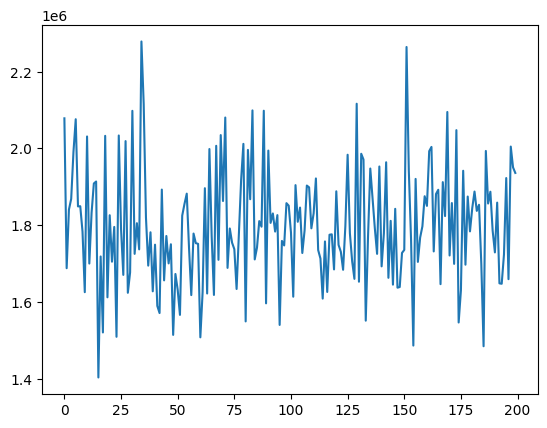

In [8]:
mtpt.plot(loss_progress) 